In [1]:
import sys
sys.path.append("../scripts")
import jax
jax.config.update("jax_enable_x64", True)
from make_lightcurve import make_lc
from make_params import make
from search_nuance import search as nsearch
#from search_wotan_tls import search as wsearch, trend
import matplotlib.pyplot as plt
import yaml


/home/exotic/code/nuance/nuance/nuance.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


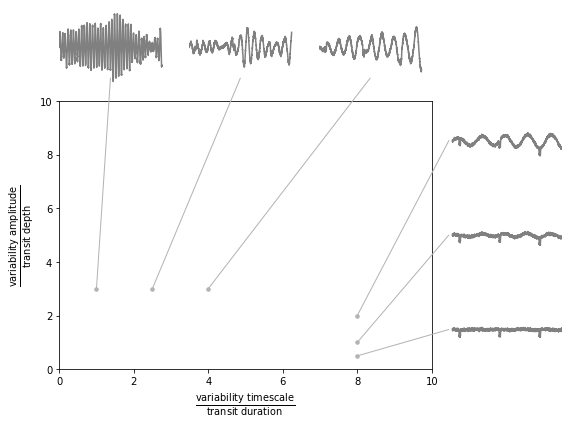

In [2]:
from matplotlib.patches import ConnectionPatch
import numpy as np
from scipy.stats import binned_statistic_2d
import pandas as pd

n = 4

amp = [0.5, 1, 2, 3][::-1]
var = [0.5, 1, 2.5, 4]
ymax = 0.06
seed = 4

scale = 1
fig = plt.figure(None, (n*2*scale, n*1.5*scale))

# main
main = plt.subplot(n, n, (n+1, n*n-1))
main.plot()
main.set_ylabel(r"$\frac{\mathrm{variability\; amplitude}}{\mathrm{transit\;depth}}$", fontsize=14)
main.set_xlabel(r"$\frac{\mathrm{variability\; timescale}}{\mathrm{transit\;duration}}$", fontsize=14)

#bins = (4,4)
#df = pd.read_csv("../data/dataset1/results/nuance/detections.csv")
#detected, _var, _amp = df.values.T.astype(float)
#stats = binned_statistic_2d(_var, _amp, detected, bins=bins)
#plt.imshow(
#    stats.statistic.T, 
#    origin="lower",
#    extent=(
#        stats.x_edge.min(), 
#        stats.x_edge.max(), 
#        stats.y_edge.min(), 
#        stats.y_edge.max()
#    )
#)
main.set_xlim(0, 10)
main.set_ylim(0, 10)

# ---

con_color = "0.7"

for i in range(1, 4):
    ax = plt.subplot(n, n, i*n+n)
    a = amp[i]
    v = 8
    params = make(amp=a, var=v, seed=seed)
    x, y, e = make_lc(params, seed)
    ax.plot(x, y, c="0.5")
    con = ConnectionPatch(
        xyA=(-0.1, 0.), xyB=(v, a), coordsA="data", coordsB="data",
        axesA=ax, axesB=main, color=con_color)
    fig.add_artist(con)
    ax.set_ylim(-ymax, ymax)
    ax.set_xlim(-0.1, np.max(x))
    plt.axis('off')
    main.plot(v, a, ".", c=con_color, ms=7)
    #plt.plot(x, trend(x, y, params), alpha=0.5)

    
for i in range(1, 4):
    ax = plt.subplot(n, n, i)
    a = amp[0]
    v = var[i]
    params = make(amp=a, var=v, seed=seed)
    x, y, e = make_lc(params, seed)
    plt.plot(x, y, c="0.5")
    con = ConnectionPatch(
    xyA=(np.mean(x), -ymax*0.8), xyB=(v, a), coordsA="data", coordsB="data",
         axesA=ax, axesB=main, color=con_color)
    fig.add_artist(con)
    ax.set_ylim(-ymax, ymax)
    ax.set_xlim(0., np.max(x)*1.1)
    plt.axis('off')
    main.plot(v, a, ".", c=con_color, ms=7)
    #plt.plot(x, trend(x, y, params), alpha=0.5)

plt.tight_layout()

NameError: name 'inset_axes' is not defined

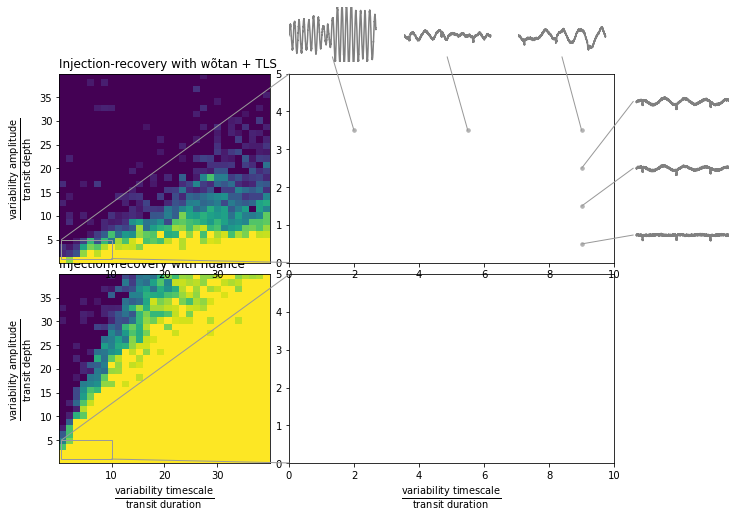

In [205]:
from matplotlib import patches

n = 3 # number of small plots
scale = 1
W = 2*n
H = n+1
HH = 2*n+1
fig = plt.figure(None, (W*2*scale, HH*1.2*scale))

def I(i, j):
    return int(j*W + i) + 1


for i in range(H*W):
    ax = plt.subplot(HH, W, i+1)
    
    
# zoom box params
a = (0.5, 1) # xy of lower left box
b = (10, 5) # xy of upper right box
pcolor="0.6"

# ON NUANCE
# --------
## Main plot
nuance_main = plt.subplot(HH, W, (I(0, n+1), I(n-2, HH-1)))
nuance_main.plot()
nuance_main.set_ylabel(r"$\frac{\mathrm{variability\; amplitude}}{\mathrm{transit\;depth}}$", fontsize=14)
nuance_main.set_xlabel(r"$\frac{\mathrm{variability\; timescale}}{\mathrm{transit\;duration}}$", fontsize=14)
nuance_main.set_title("Injection-recovery with nuance", loc="left")

bins = (30,30)
df = pd.read_csv("../data/dataset3/results/nuance/detections.csv")
detected, _var, _amp = df.values.T.astype(float)
stats = binned_statistic_2d(_var, _amp, detected, bins=bins)
plt.imshow(
    stats.statistic.T, 
    origin="lower",
    extent=(
        stats.x_edge.min(), 
        stats.x_edge.max(), 
        stats.y_edge.min(), 
        stats.y_edge.max()
    ),
    aspect="auto"
)

# Zoomed plot (dataset2)
nuance_zoom = plt.subplot(HH, W, (I(n-1, n+1), I(W-2, HH-1)))
nuance_zoom.set_xlabel(r"$\frac{\mathrm{variability\; timescale}}{\mathrm{transit\;duration}}$", fontsize=14)
nuance_zoom.set_xlim(0, 10)
nuance_zoom.set_ylim(0, 5)
p = patches.Polygon([a, (a[0], b[1]), (b[0], b[1]), (b[0], a[1])], fill=False, ec=pcolor)
nuance_main.add_patch(p)
con = ConnectionPatch(xyA=(a[0], b[1]), xyB=(0.01, b[1]-0.01), coordsA="data", coordsB="data", axesA=nuance_main, axesB=nuance_zoom, color=pcolor)
fig.add_artist(con)
con = ConnectionPatch(xyA=(b[0], a[1]), xyB=(0.01, 0.01), coordsA="data", coordsB="data", axesA=nuance_main, axesB=nuance_zoom, color=pcolor)
fig.add_artist(con)

# ON WOTAN
# --------
## Main plot
wotan_main = plt.subplot(HH, W, (I(0, 1), I(n-2, H-1)))
wotan_main.plot()
wotan_main.set_ylabel(r"$\frac{\mathrm{variability\; amplitude}}{\mathrm{transit\;depth}}$", fontsize=14)
wotan_main.set_title("Injection-recovery with wõtan + TLS", loc="left")

bins = (30,30)
df = pd.read_csv("../data/dataset3/results/wotan_tls/detections.csv")
detected, _var, _amp = df.values.T.astype(float)
stats = binned_statistic_2d(_var, _amp, detected, bins=bins)
plt.imshow(
    stats.statistic.T, 
    origin="lower",
    extent=(
        stats.x_edge.min(), 
        stats.x_edge.max(), 
        stats.y_edge.min(), 
        stats.y_edge.max()
    ),
    aspect="auto"
)

# Zoomed plot (dataset2)
wotan_zoom = plt.subplot(HH, W, (I(n-1, 1), I(W-2, H-1)))
wotan_zoom.set_xlim(0, 10)
wotan_zoom.set_ylim(0, 5)
p = patches.Polygon([a, (a[0], b[1]), (b[0], b[1]), (b[0], a[1])], fill=False, ec=pcolor)
wotan_main.add_patch(p)
con = ConnectionPatch(xyA=(a[0], b[1]), xyB=(0.01, b[1]-0.01), coordsA="data", coordsB="data", axesA=wotan_main, axesB=wotan_zoom, color=pcolor)
fig.add_artist(con)
con = ConnectionPatch(xyA=(b[0], a[1]), xyB=(0.01, 0.01), coordsA="data", coordsB="data", axesA=wotan_main, axesB=wotan_zoom, color=pcolor)
fig.add_artist(con)
    

# removing some axes
# ------------------
for i in range(2):
    ax = plt.subplot(HH, W, i+1)
    plt.axis('off')
ax = plt.subplot(HH, W, I(W-1, 0))
plt.axis('off')

# light curves examples
# ---------------------
amp = np.linspace(0.5, 3.5, 4)[::-1]
var = np.linspace(2, b[0]-1, 3)
ymax = 0.06
seed = 4

for i, a in enumerate(amp[1::]):
    ax = plt.subplot(HH, W, I(W-1, i+1))
    v = b[0] - 1
    params = make(amp=a, var=v, seed=seed)
    x, y, e = make_lc(params, seed)
    ax.plot(x, y, c="0.5")
    con = ConnectionPatch(
        xyA=(-0.1, 0.), xyB=(v, a), coordsA="data", coordsB="data",
        axesA=ax, axesB=wotan_zoom, color=pcolor)
    fig.add_artist(con)
    ax.set_ylim(-ymax, ymax)
    ax.set_xlim(-0.1, np.max(x))
    plt.axis('off')
    wotan_zoom.plot(v, a, ".", c=con_color, ms=7)
    #plt.plot(x, trend(x, y, params), alpha=0.5)

    
for i, v in enumerate(var):
    ax = plt.subplot(HH, W, I(n+i-1, 0))
    a = amp[0]
    params = make(amp=a, var=v, seed=seed)
    x, y, e = make_lc(params, seed)
    plt.plot(x, y, c="0.5")
    con = ConnectionPatch(
    xyA=(np.mean(x), -ymax*0.8), xyB=(v, a), coordsA="data", coordsB="data",
         axesA=ax, axesB=wotan_zoom, color=pcolor)
    fig.add_artist(con)
    ax.set_ylim(-ymax, ymax)
    ax.set_xlim(0., np.max(x)*1.1)
    plt.axis('off')
    wotan_zoom.plot(v, a, ".", c=con_color, ms=7)
    #plt.plot(x, trend(x, y, params), alpha=0.5)
    
    
# colorbar
axins = inset_axes(
   ax2,
   width="5%",  # width = 5% of parent_bbox width
   height="50%",  # height : 50%
   loc='lower left',
   bbox_to_anchor=(1.05, 0., 1, 1),
   bbox_transform=ax2.transAxes,
   borderpad=0,
   )

plt.tight_layout()

In [174]:
b[0]

15

In [90]:
I(2*n-1, n-1)

32

In [89]:
I(3, 1)

12

In [87]:
2*n*n

32

In [66]:
2*n*n

32

In [46]:
I(n-1, 1)

34

In [21]:
2*n+n+1

13

In [11]:
df2 = pd.read_csv("../data/dataset2/results/nuance/detections.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/dataset2/results/nuance/detections.csv'